In [1]:
1+3

4

In [2]:
85769857 * 908790

77946788343030

In [2]:
## ingestion of the data

import pandas as pd

df = pd.read_csv(r"C:\Users\hp\Desktop\Code_files\DPP\notebooks\data\cubic_zirconia.csv")

df.head()




,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [5]:
df.shape

(26967, 11)

In [6]:
df.size

296637

In [7]:
26967 * 11

296637

In [9]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
6770,6771,1.51,Premium,G,VS1,61.1,58.0,7.38,7.36,4.50,13293
22096,22097,0.37,Premium,G,SI1,60.0,57.0,4.70,4.67,2.81,708
3567,3568,1.01,Very Good,E,VVS2,63.4,57.0,6.45,6.33,4.05,8797
12694,12695,1.10,Ideal,I,SI1,62.1,57.0,6.60,6.64,4.11,5037
4622,4623,1.00,Premium,G,VVS2,60.5,62.0,6.44,6.39,3.88,7392


In [10]:
## missing values

df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [16]:
    ## need to drop the id column bcoz its of no use

df1 = df.drop(labels= ["Unnamed: 0"], axis=1)

In [17]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [18]:
df1.duplicated().sum()

34

In [19]:
## categorical and numerical cols

cat_column = df1.columns[df1.dtypes == "object"]

In [20]:
cat_column

Index(['cut', 'color', 'clarity'], dtype='object')

In [22]:
df1[cat_column]

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [24]:
df1[cat_column].describe()

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [27]:
df1[cat_column]["cut"].value_counts()

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [28]:
df1[cat_column]["color"].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [29]:
df1[cat_column]["clarity"].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

In [21]:
num_column = df1.columns[df1.dtypes != "object"]
print(num_column)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [23]:
df1[num_column]

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...
26962,1.11,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,61.8,56.0,4.19,4.20,2.60,682


In [25]:
df1[num_column].describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [26]:
df1[num_column].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


Matplotlib is building the font cache; this may take a moment.


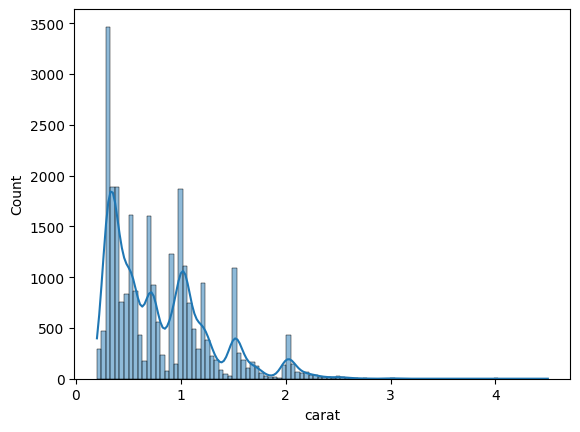

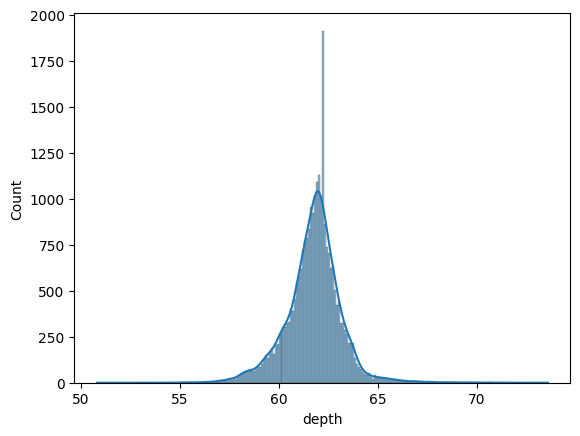

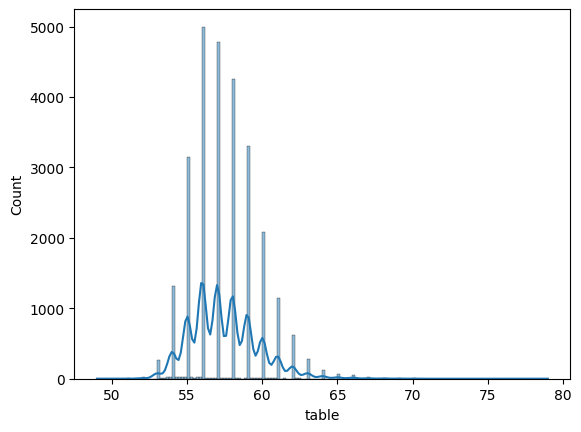

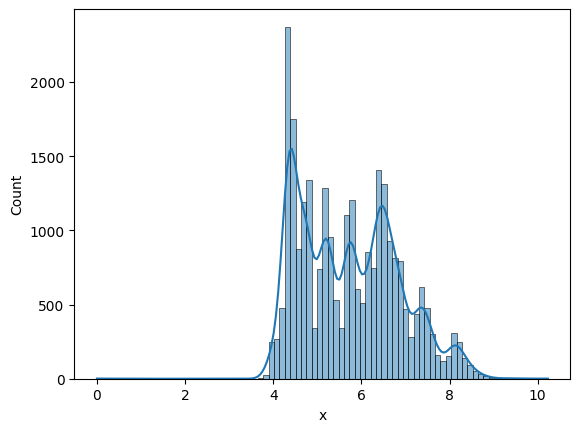

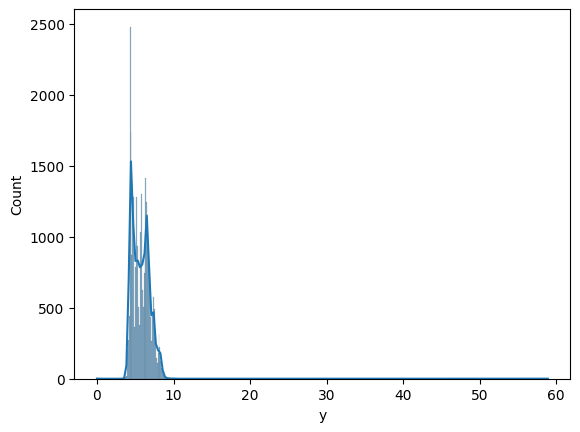

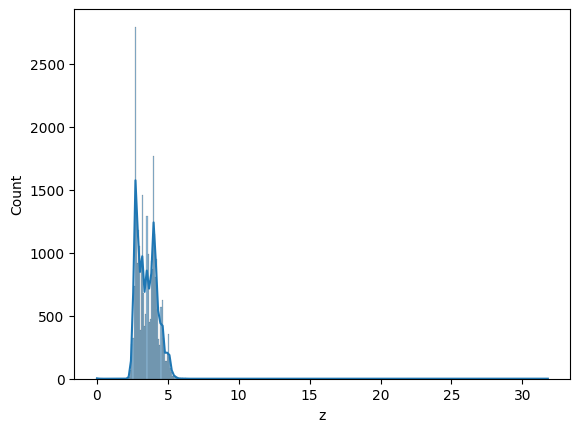

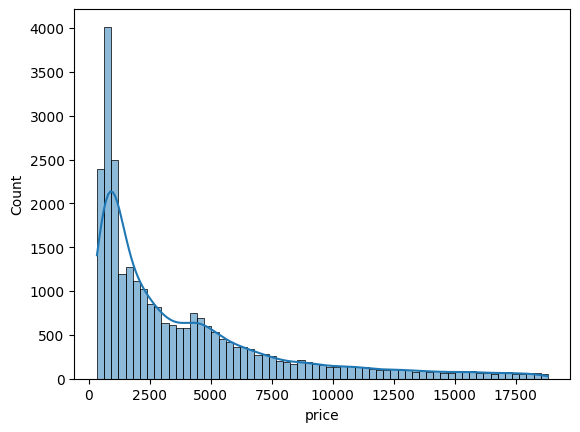

In [30]:
## will try to plot some data for numerical data

import seaborn as sns
import matplotlib.pyplot as plt

for col in num_column:
    sns.histplot(data = df1,x = col , kde = True)
    print("\n")
    plt.show()

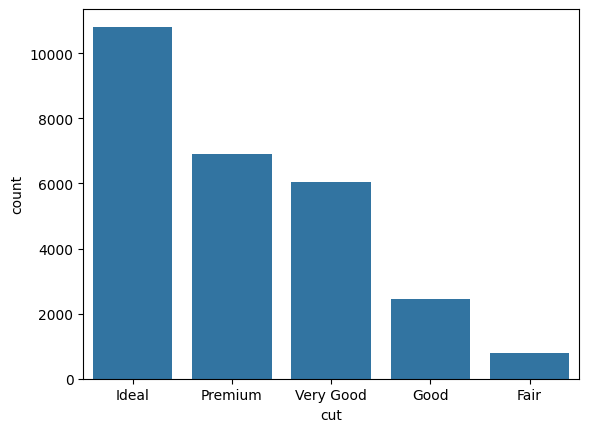

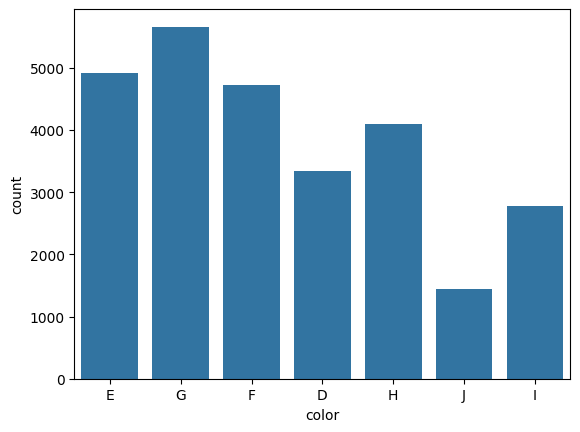

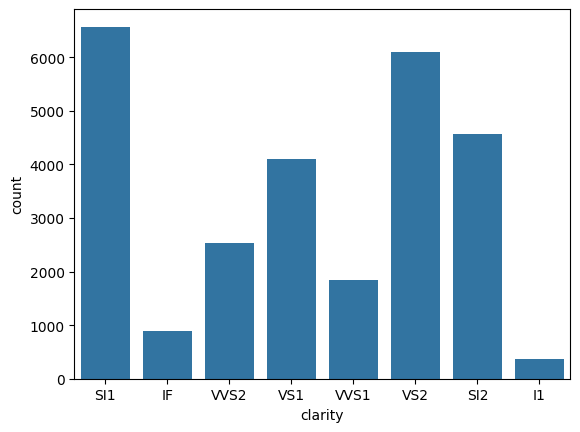

In [33]:
###categoricl cata plotting

import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_column:
    sns.countplot(data = df1,x = col )
    print("\n")
    plt.show()

<Axes: >

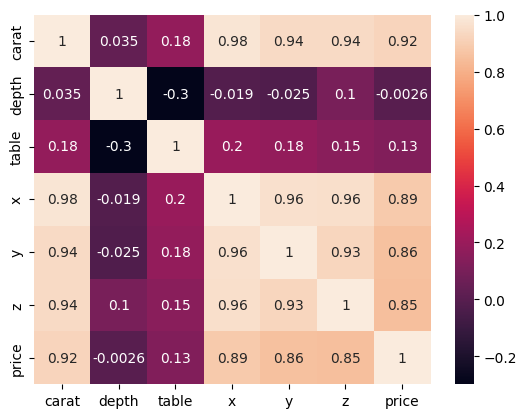

In [37]:
# next we will find the correlation between the all numerical columns using heatmaps

# always remember that correlation can be done only on numerical features only

## and mainly the peirson correlation ranges between -1 to 1

# r-square ranges from 0 to 1 which is also a correlation measurer

sns.heatmap(df1[num_column].corr(), annot= True)

In [39]:
## now feature engineering part...

# firstly will try to convert the categorical features into numerical features using encoding techniques

df1[cat_column]["cut"].unique()



array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [40]:
df1[cat_column]


,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
...,...,...,...
26962,Premium,G,SI1
26963,Ideal,H,IF
26964,Premium,E,VS2
26965,Very Good,F,VVS2


In [41]:
df1[cat_column]["color"].unique()


array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [42]:
df1[cat_column]["clarity"].unique()


array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [44]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}


In [45]:
df1["cut"]=df1["cut"].map(cut_map)
df1["clarity"]=df1["clarity"].map(clarity_map)
df1["color"]=df1["color"].map(color_map)

In [46]:
df1

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,4,4,3,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,5,5,8,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,4,2,4,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,3,3,6,61.8,56.0,4.19,4.20,2.60,682


In [47]:
## in above cell we can see that all the cat_values got changed to numbers


some random code snippets checking below....for logger and exception files

In [1]:
import logging
import os
from datetime import datetime



In [2]:
datetime.now()

datetime.datetime(2024, 2, 9, 14, 2, 6, 101151)

In [3]:
f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

'02_09_2024_14_04_14.log'

In [5]:
os.path.join(os.getcwd(),"logs")

'c:\\Users\\hp\\Desktop\\Code_files\\DPP\\notebooks\\logs'

In [10]:
from src.DimondPricePrediction.logger  import logging

ModuleNotFoundError: No module named 'src'

In [12]:
import sys

try:
    ans = 1/0
except Exception as e:
    print(sys.exc_info())
    print(e)

(<class 'ZeroDivisionError'>, ZeroDivisionError('division by zero'), <traceback object at 0x000001D97A58F500>)
division by zero


In [13]:
try:
    ans = 1/0
except Exception as e:
    _,_,exc_tb = sys.exc_info()
    print(exc_tb.tb_lineno)
    print(exc_tb.tb_frame.f_code.co_filename)
    print(e)

2
C:\Users\hp\AppData\Local\Temp\ipykernel_12104\4150427217.py
division by zero
